In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

In [2]:
#Load datasets
train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')

In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


## Analys of Target values 

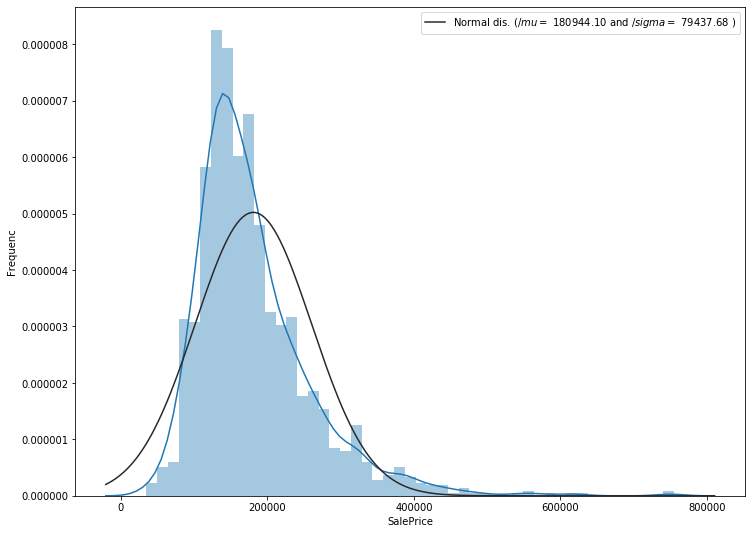

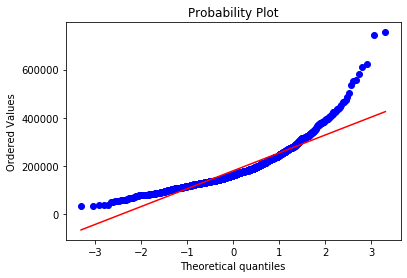

In [5]:
plt.subplots(figsize=(12,9))
sns.distplot(train['SalePrice'], fit=stats.norm)

#Get the fitted parameters used by the function 
(mu, sigma) = stats.norm.fit(train['SalePrice'])

#Distribution plot
plt.legend(['Normal dis. ($/mu=$ {:.2f} and $/sigma=$ {:.2f} )'.format(mu, sigma)], loc = 'best')
plt.ylabel('Frequenc')

#Probability plot
fig = plt.figure()
stats.probplot(train['SalePrice'], plot=plt)
plt.show()

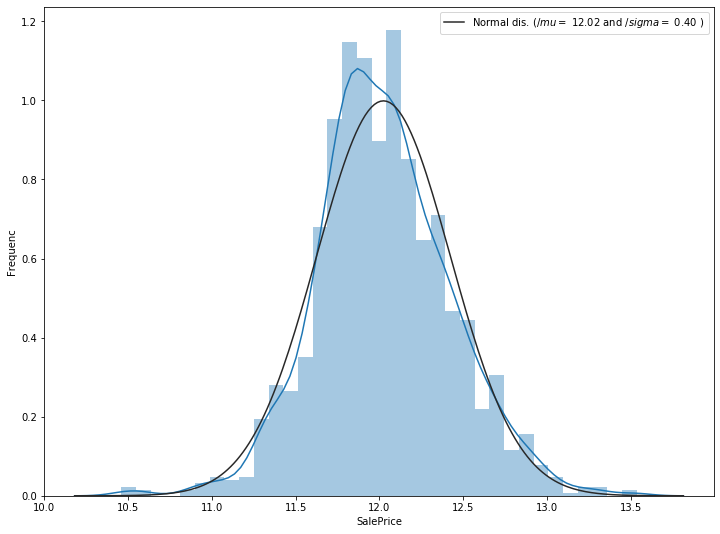

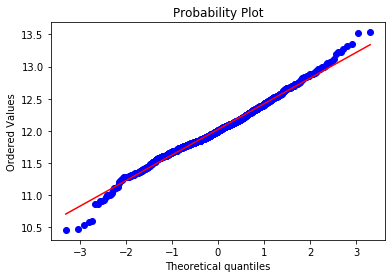

In [6]:
#Log func normalizing
train['SalePrice'] = np.log1p(train['SalePrice'])

#Check
plt.subplots(figsize=(12,9))
sns.distplot(train['SalePrice'], fit=stats.norm)
(mu, sigma) = stats.norm.fit(train['SalePrice'])
plt.legend(['Normal dis. ($/mu=$ {:.2f} and $/sigma=$ {:.2f} )'.format(mu, sigma)], loc = 'best')
plt.ylabel('Frequenc')
fig = plt.figure()
stats.probplot(train['SalePrice'], plot=plt)
plt.show()
           

## Check the missing values

In [7]:
train.columns[train.isnull().any()]

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

<function matplotlib.pyplot.show(*args, **kw)>

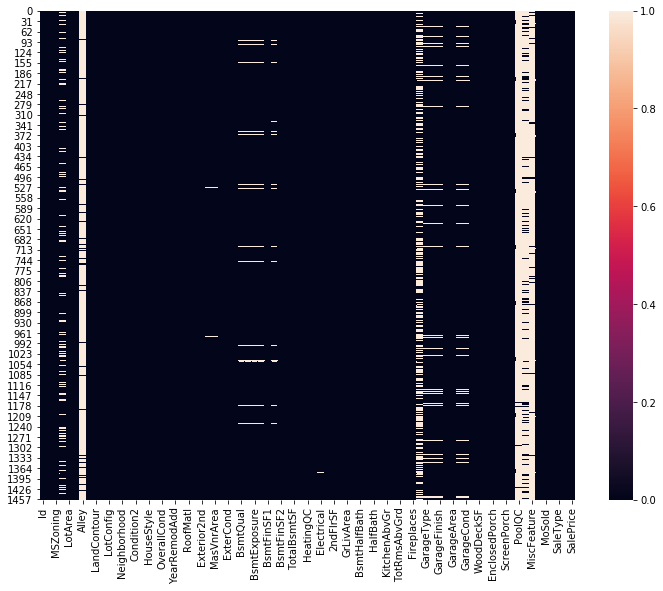

In [8]:
plt.subplots(figsize=(12,9))
sns.heatmap(train.isnull())
plt.show

In [9]:
#Get the per cent of missing dates
isnull = train.isnull().sum()/len(train)*100
isnull = isnull[isnull > 0]
isnull.sort_values(inplace = True, ascending = False)
isnull

PoolQC          99.520219
MiscFeature     96.298835
Alley           93.762851
Fence           80.740233
FireplaceQu     47.224126
LotFrontage     17.751885
GarageYrBlt      5.551748
GarageType       5.551748
GarageFinish     5.551748
GarageQual       5.551748
GarageCond       5.551748
BsmtFinType2     2.604524
BsmtExposure     2.604524
BsmtFinType1     2.535984
BsmtCond         2.535984
BsmtQual         2.535984
MasVnrArea       0.548321
MasVnrType       0.548321
Electrical       0.068540
dtype: float64

In [10]:
#Preparing categories to gist
isnull = isnull.to_frame()
isnull.columns = ['count']
isnull.index.names = ['Name']
isnull['Name'] = isnull.index

<function matplotlib.pyplot.show(*args, **kw)>

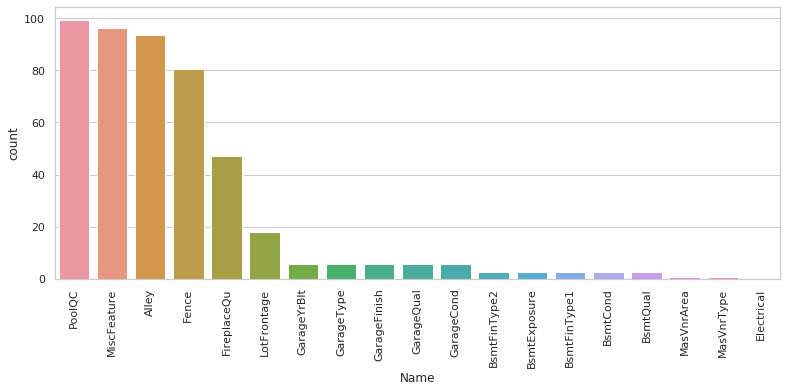

In [11]:
#Get the gist of a missing values 
plt.figure(figsize = (13, 5))
sns.set(style = 'whitegrid')
sns.barplot(x = 'Name', y = 'count', data = isnull)
plt.xticks(rotation=90)
plt.show

## Check the missing values on test dates

In [12]:
test.columns[test.isnull().any()]

Index(['MSZoning', 'LotFrontage', 'Alley', 'Utilities', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath',
       'BsmtHalfBath', 'KitchenQual', 'Functional', 'FireplaceQu',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea',
       'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType'],
      dtype='object')

<function matplotlib.pyplot.show(*args, **kw)>

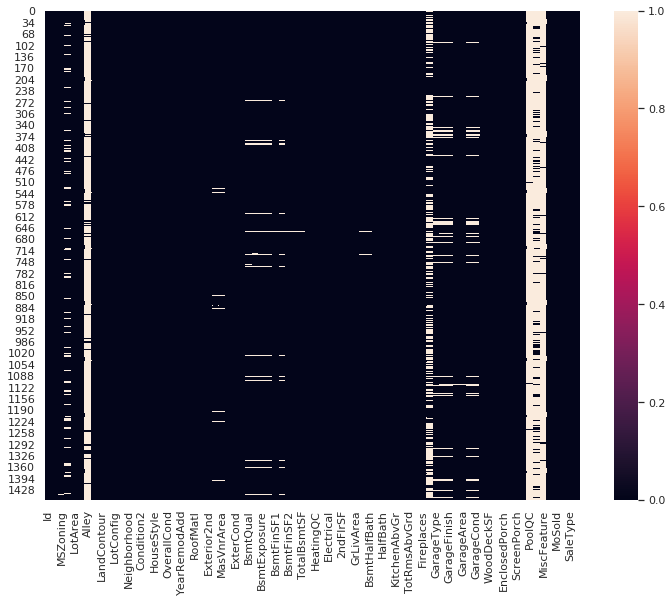

In [13]:
plt.subplots(figsize=(12,9))
sns.heatmap(test.isnull())
plt.show

In [14]:
#Get the per cent of missing dates
isnull_t = test.isnull().sum()/len(test)*100
isnull_t = isnull_t[isnull_t > 0]
isnull_t.sort_values(inplace = True, ascending = False)
isnull_t

PoolQC          99.794380
MiscFeature     96.504455
Alley           92.666210
Fence           80.123372
FireplaceQu     50.034270
LotFrontage     15.558602
GarageYrBlt      5.346127
GarageCond       5.346127
GarageQual       5.346127
GarageFinish     5.346127
GarageType       5.209047
BsmtCond         3.084304
BsmtExposure     3.015764
BsmtQual         3.015764
BsmtFinType1     2.878684
BsmtFinType2     2.878684
MasVnrType       1.096642
MasVnrArea       1.028101
MSZoning         0.274160
BsmtFullBath     0.137080
BsmtHalfBath     0.137080
Utilities        0.137080
Functional       0.137080
Exterior2nd      0.068540
Exterior1st      0.068540
SaleType         0.068540
BsmtFinSF1       0.068540
BsmtFinSF2       0.068540
BsmtUnfSF        0.068540
KitchenQual      0.068540
GarageCars       0.068540
GarageArea       0.068540
TotalBsmtSF      0.068540
dtype: float64

In [15]:
#Preparing categories to gist
isnull_t = isnull_t.to_frame()
isnull_t.columns = ['count']
isnull_t.index.names = ['Name']
isnull_t['Name'] = isnull_t.index

<function matplotlib.pyplot.show(*args, **kw)>

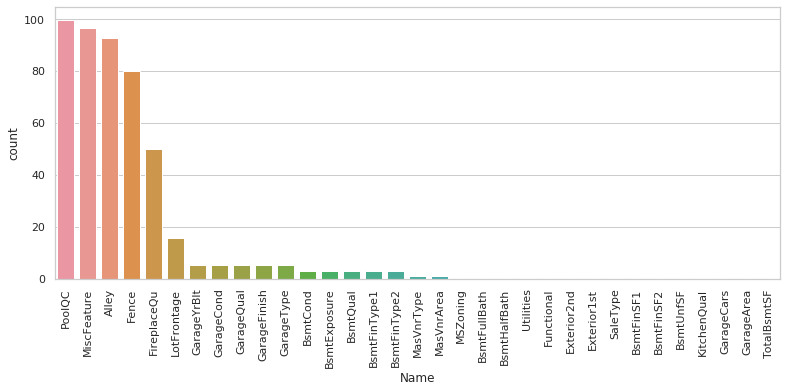

In [16]:
#Get the gist of a missing values 
plt.figure(figsize = (13, 5))
sns.set(style = 'whitegrid')
sns.barplot(x = 'Name', y = 'count', data = isnull_t)
plt.xticks(rotation=90)
plt.show

## Making corr matrix

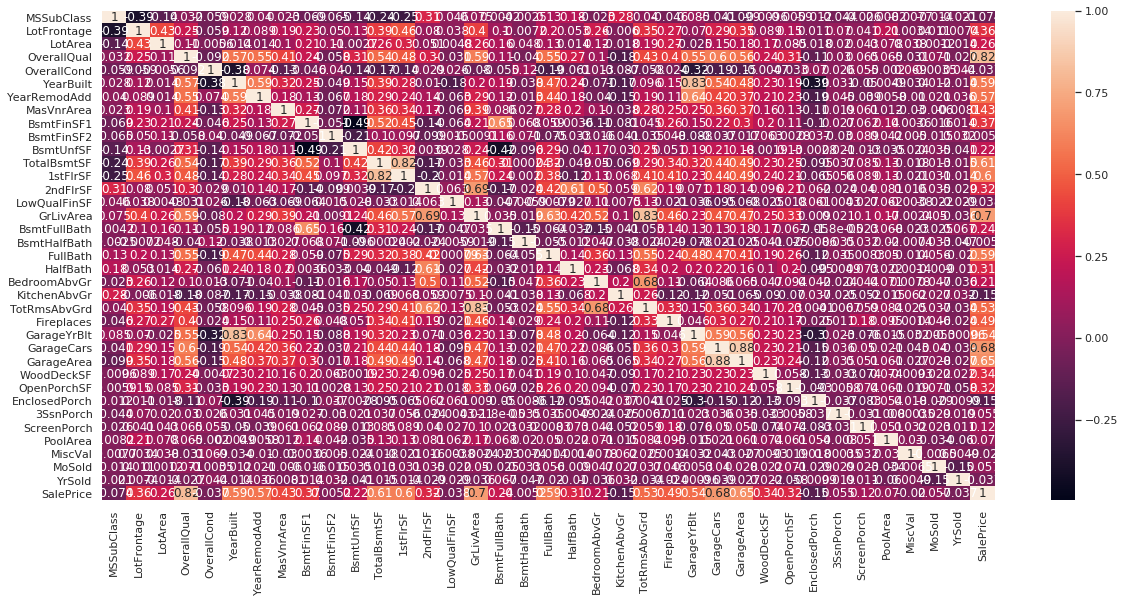

In [17]:
#Preparing dates to matrix
train_corr = train.select_dtypes(include = [np.number])
train_corr.shape
del train_corr['Id'] #removed unnecessary metric
corr = train_corr.corr()
#Building the corr matrix
plt.subplots(figsize = (20, 9))
sns.heatmap(corr, annot = True)

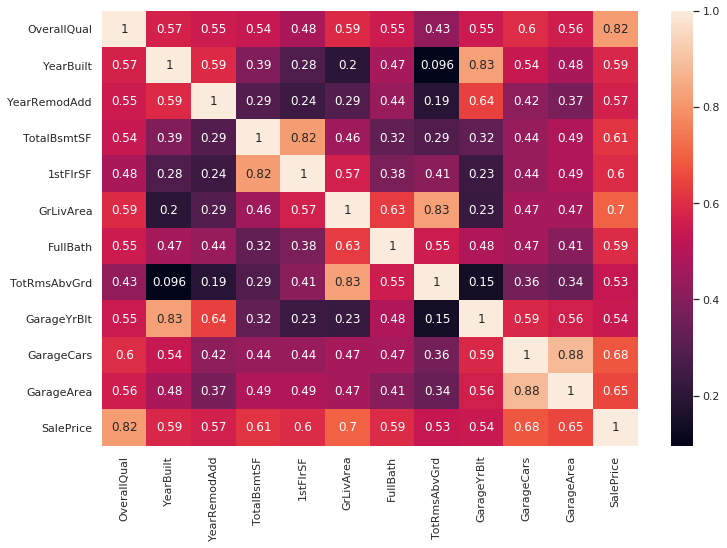

In [18]:
#Cut the matrix to values greater than 0.5 to build a simpler matrix
top_feature = corr.index[abs(corr['SalePrice']>0.5)]
plt.subplots(figsize=(12,8))
top_corr = train[top_feature].corr()
sns.heatmap(top_corr, annot = True)
plt.show()

## Choose the most corr catigories
In this case it is a OverallQual, because it has the max corr with SalePrice.
Corr = 0.82

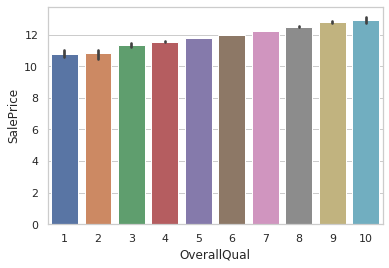

In [19]:
#Viewing corr OverallQual to SalePrice
train.OverallQual.unique()
sns.barplot(train.OverallQual, train.SalePrice)

Gray lines it's a how it changes in this case

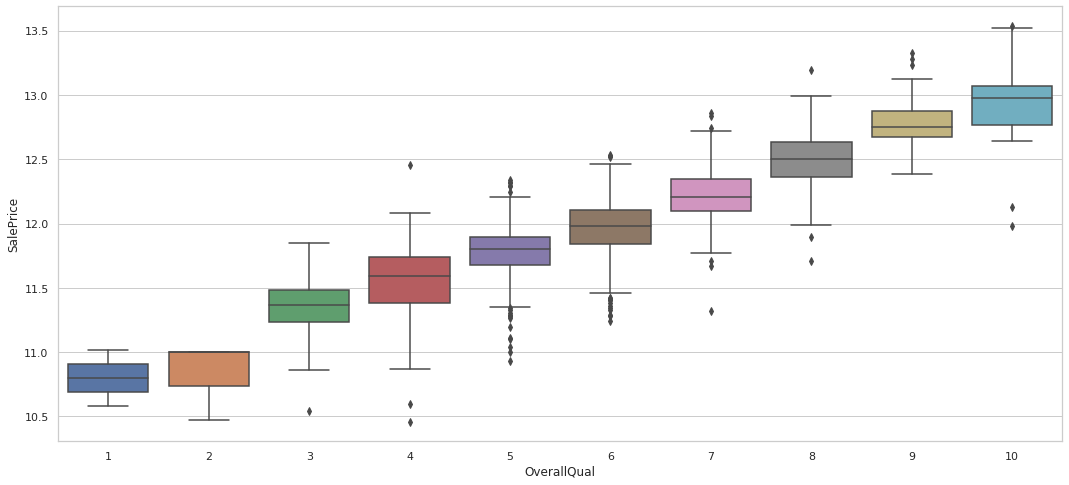

In [20]:
#Consider the correlation in more detail
plt.figure(figsize = (18,8))
sns.boxplot(x=train.OverallQual, y=train.SalePrice)

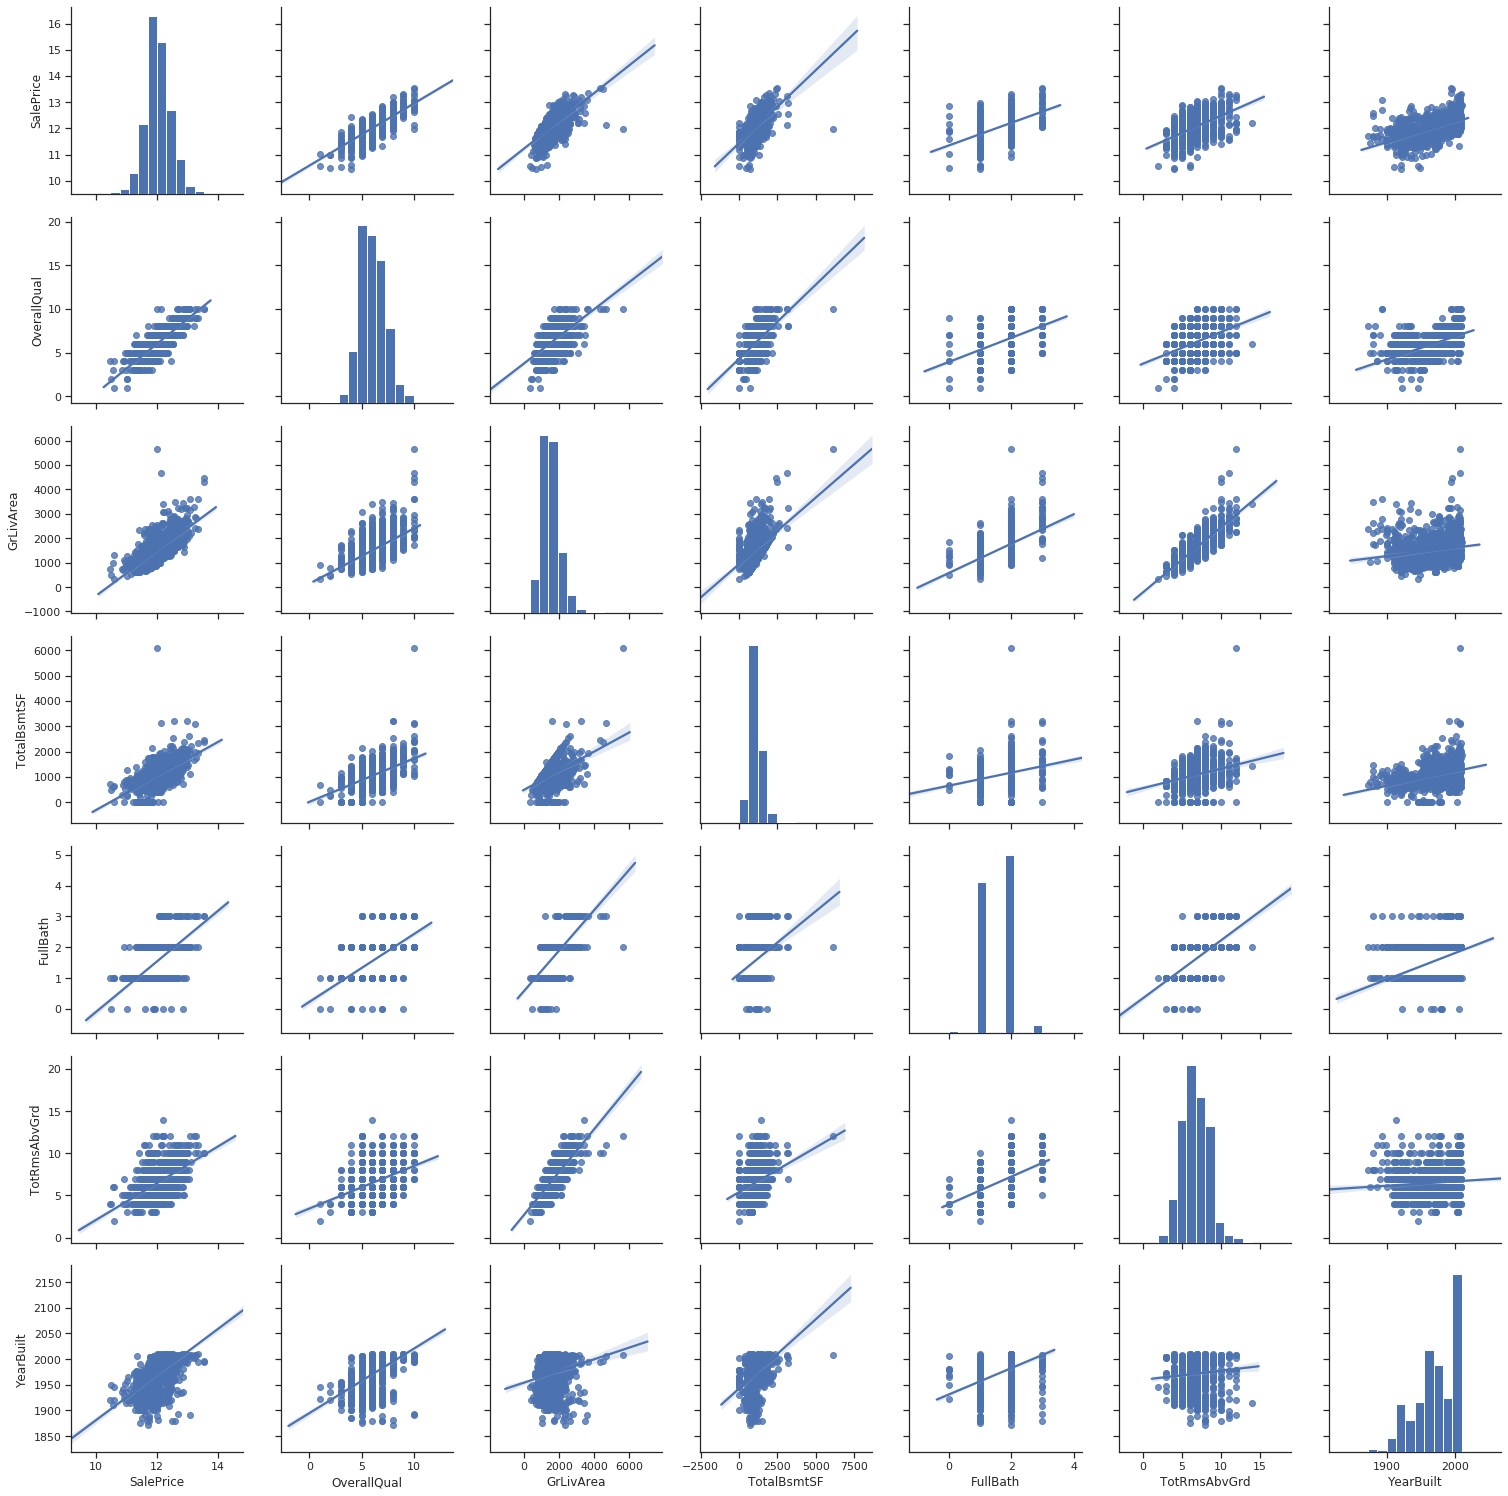

In [21]:
#Viewing corr matrix in graphs
col = ['SalePrice', 'OverallQual', 'GrLivArea', 'TotalBsmtSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt']
sns.set(style = 'ticks')
sns.pairplot(train[col], height=3, kind='reg')

In [22]:
print('The most importent feature relative to target')
corr = train.corr()
corr.sort_values(['SalePrice'],ascending = False, inplace = True)
corr.SalePrice

The most importent feature relative to target


SalePrice        1.000000
OverallQual      0.817221
GrLivArea        0.700904
GarageCars       0.680677
GarageArea       0.650904
TotalBsmtSF      0.612292
1stFlrSF         0.597063
FullBath         0.594789
YearBuilt        0.586554
YearRemodAdd     0.565603
GarageYrBlt      0.541003
TotRmsAbvGrd     0.534391
Fireplaces       0.489417
MasVnrArea       0.430752
BsmtFinSF1       0.372305
LotFrontage      0.355943
WoodDeckSF       0.338278
OpenPorchSF      0.321143
2ndFlrSF         0.319212
HalfBath         0.314413
LotArea          0.257316
BsmtFullBath     0.236564
BsmtUnfSF        0.221860
BedroomAbvGr     0.209087
ScreenPorch      0.121158
PoolArea         0.069786
MoSold           0.057307
3SsnPorch        0.054878
BsmtFinSF2       0.005154
BsmtHalfBath    -0.005200
Id              -0.017597
MiscVal         -0.020040
OverallCond     -0.036791
YrSold          -0.037235
LowQualFinSF    -0.037989
MSSubClass      -0.074164
KitchenAbvGr    -0.147600
EnclosedPorch   -0.149137
Name: SalePr

## Normalize missing values

In [23]:
# PoolQC has missing value ratio is 99%+. So, there is fill by None
train['PoolQC'] = train['PoolQC'].fillna('None')
#Arround 50% missing values attributes have been fill by None
train['MiscFeature'] = train['MiscFeature'].fillna('None')
train['Alley'] = train['Alley'].fillna('None')
train['Fence'] = train['Fence'].fillna('None')
train['FireplaceQu'] = train['FireplaceQu'].fillna('None')
#Replacing None, cuz this metrix is not importent
for col in ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']:
    train[col] = train[col].fillna('None')
for col in ('BsmtFinType2', 'BsmtExposure', 'BsmtFinType1', 'BsmtCond', 'BsmtQual'):
    train[col] = train[col].fillna('None')
train['MasVnrType'] = train['MasVnrType'].fillna('None')

In [24]:
#Group by neighborhood and fill in missing value by the median LotFrontage of all the neighborhood
train['LotFrontage'] = train.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

In [25]:
#Replacing zero, cuz this metrix is not importent
for col in ['GarageYrBlt', 'GarageArea', 'GarageCars']:
    train[col] = train[col].fillna(int(0))
train['MasVnrArea'] = train['MasVnrArea'].fillna(int(0))

In [26]:
#There is put mode value 
train['Electrical'] = train['Electrical'].fillna(train['Electrical']).mode()[0]

In [27]:
#There is no need of Utilities
train = train.drop(['Utilities'], axis=1)

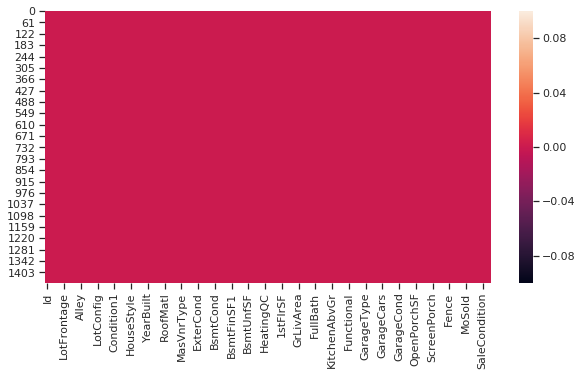

In [28]:
#Checking there is any null value 
plt.figure(figsize=(10, 5))
sns.heatmap(train.isnull())

## Normalize missing values on test dates

In [29]:
# PoolQC has missing value ratio is 99%+. So, there is fill by None
test['PoolQC'] = test['PoolQC'].fillna('None')
#Arround 50% missing values attributes have been fill by None
test['MiscFeature'] = test['MiscFeature'].fillna('None')
test['Alley'] = test['Alley'].fillna('None')
test['Fence'] = test['Fence'].fillna('None')
test['FireplaceQu'] = test['FireplaceQu'].fillna('None')
#Replacing None, cuz this metrix is not importent
for col in ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']:
    test[col] = test[col].fillna('None')
for col in ('BsmtFinType2', 'BsmtExposure', 'BsmtFinType1', 'BsmtCond', 'BsmtQual'):
    test[col] = test[col].fillna('None')
test['MSZoning'] = test['MSZoning'].fillna('None')
test['Exterior2nd'] = test['Exterior2nd'].fillna('None')
test['Exterior1st'] = test['Exterior1st'].fillna('None')
test['SaleType'] = test['SaleType'].fillna('None')
test['KitchenQual'] = test['KitchenQual'].fillna('None')
test['MasVnrType'] = test['MasVnrType'].fillna('None')
test['Functional'] = test['Functional'].fillna('None')

In [30]:
#Group by neighborhood and fill in missing value by the median LotFrontage of all the neighborhood
test['LotFrontage'] = test.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))
#Replacing zero, cuz this metrix is not importent
for col in ['GarageYrBlt', 'GarageArea', 'GarageCars','BsmtFullBath','BsmtHalfBath','BsmtFinSF1','BsmtFinSF2','TotalBsmtSF','BsmtUnfSF']:
    test[col] = test[col].fillna(int(0))
test['MasVnrArea'] = test['MasVnrArea'].fillna(int(0))
#There is put mode value 
test['Electrical'] = test['Electrical'].fillna(test['Electrical']).mode()[0]
test = test.drop(['Utilities'], axis=1)

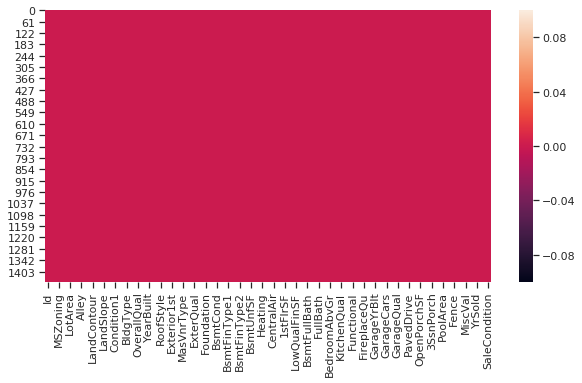

In [31]:
plt.figure(figsize=(10, 5))
sns.heatmap(test.isnull())

# Inputing values

In [32]:
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold', 'MSZoning', 'LandContour', 'LotConfig', 'Neighborhood',
        'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
        'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'Foundation', 'GarageType', 'MiscFeature', 
        'SaleType', 'SaleCondition', 'Electrical', 'Heating')

In [33]:
from sklearn.preprocessing import LabelEncoder
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(train[c].values)) 
    train[c] = lbl.transform(list(train[c].values))

In [34]:
from sklearn.preprocessing import LabelEncoder
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(test[c].values)) 
    test[c] = lbl.transform(list(test[c].values))

### Prepraring data for prediction

In [35]:
#Take targate variable into y
y = train['SalePrice']
#Delete the saleprice from train 
del train['SalePrice']
#Take their values in X and y
y = y.values
X = train.values

### Linear Regression

In [150]:
#Train the model
from sklearn import linear_model
model = linear_model.LinearRegression()
#Fit the model
X_test = test.values
model.fit(X, y)
#Prediction
print("Predict value " + str(model.predict([X[142]])))
print("Real value " + str(y[142]))
#Accuracy 
print(f"Accuracy --> {model.score(X_test, y)*100}%", )

Predict value [11.73071436]
Real value 12.019749091416921
Accuracy --> -96.72803857402104%


### GradientRegressor

In [143]:
from sklearn.ensemble import GradientBoostingRegressor
GBR = GradientBoostingRegressor(learning_rate =0.1 ,n_estimators=10000,  max_depth=16)
GBR.fit(X, y)
print(f"Accuracy --> {GBR.score(X_test, y)*100}%")

Accuracy --> -99.58821706122039%


In [126]:
predictions = GBR.predict(X_test)
submission = pd.DataFrame()
submission['Id'] = test.Id
submission['SalePrice'] = np.exp(predictions)
submission.to_csv('prediction_GBR10000_16.csv',index = False)

## RandomForestRegressor

In [119]:
from sklearn.ensemble import RandomForestRegressor
RFR = RandomForestRegressor(random_state=1, n_estimators=10, max_depth = 16)
RFR.fit(X, y)
print(f"Accuracy --> {RFR.score(X_test, y)*100}%")

Accuracy --> -85.2952891946336%


## ExtraTreesRegressor

In [142]:
from sklearn.ensemble import ExtraTreesRegressor
ETR = ExtraTreesRegressor(n_estimators=100, max_depth=16)
ETR.fit(X,y )
print(f"Accuracy --> {ETR.score(X_test, y)*100}%")

Accuracy --> -87.56210695716639%
